### Unidad 4, Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow.

## Ecuaciones Diferenciales - Método de Euler

Como su nombre lo indica, una simulación dinámica pretende modelar el comportamiento de diferentes sistemas en el tiempo a partir de ecuaciones diferenciales de diferentes grados, de acuerdo a la cantidad de veces que una variable es derivada.<br>
Los sistemas pueden o no ser lineales, según la cantidad de variables: <br>
<center><img src="./resources/variables.png" width="600" height="500" ></center>

Para simular el sistema debemos partir de las variables de estado del sistema ( posición, velocidad y aceleración son algunos ejemplos de variables que dependen del tiempo ) e iremos iterando  una serie de veces para actualizar variables resultado ( energía cinética, fuerza, y distintas variables que dependan del estado).<br>
En principio, debemos saber las condiciones iniciales del sistema y aplicar un método numérico apropiado para la resolución de ecuaciones diferenciales ordinarias, en este caso, utilizarmentos el método de Euler.<br>

## Método de Euler
Éste busca la solución a una ecuación diferencial avanzando sobre la función en incrementos finitos.<br>
Con la ecuación horaria como dato, los pasos a seguir para dicha simulación serán<br>
- Pasarle a la simulación las condiciones iniciales.
- Chequear si la instancia de la simulación anterior fue la última (es decir, tenemos tantas simulaciones como valores discretos de tiempo).
    - Si no lo fuera, se actualizan las  variables de estado y a partir de estas las variables resultado.
    - Si lo fuera, finaliza la simulación y devuelve resultados para su posterior análisis

Éste es un método de primer orden, esto quiere decir que cada variable se calcula a partir de su valor en el tiempo anterior y el estado del sistema se actualiza en cada iteración.<br>
Su error local es proporcional al cuadrado del paso, y su error global es proporcional al tamaño del paso (es un acumulado de los errores locales).<br><br>
Consiste en seguir las tangentes de la función en cada punto, sabiendo que la derivada de la función (dato) representa la solución de una ecuación diferencial ordinaria entonces unimos el punto conocido con el punto a calcular a partir de una recta que tiene como pendiente esta derivada.<br>
Iterando múltiples veces, obtendremos datos que validarán el modelo y permitirán contrastarlo contra otros (como vimos en el apunte de derivadas), y/o compararlo con datos experimentales.<br><br>
Resumiendo, estamos tratanto de resolver ecuaciones de la forma 
$( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y))$<br><br>
Ya conocido el método numérico de resolución de derivadas sabemos que
$( \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+dt)-y(t)}{dt})$<br><br>
Entonces, reordenando:
$( y(t+dt) = \frac{\mathrm{d}y}{\mathrm{d}t}dt + y(t))$.<br><br>
Finalmente, podemos propagar iterando desde $( y_n )$  que corresponde al momento $( t )$, y obtener el valor de $( y_{n+1} )$  que corresponde al momento $( (t+dt) )$: <br>
$( y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t} dt )$ <br><br>
$( y_{n+1} = y_n + f(t,y_n) dt )$<br><br>

### Método de Cromer:
La diferencia con el método de Euler estándar es que el método de Euler semi-implícito usa v_n+1 en la ecuación para x_n+1 , mientras que el método de Euler usa v_n.
Es mas estable en problemas de orbitas y oscilatorios, pero en cuanto a precision es igual de pobre.
Se calcula en otro orden
aceleracion --> velocidad --> posicion

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Ejemplo 1. Decaimiento radioactivo.
Si la velocidad con la que decae una partícula está dada por<br>
$( \dot{y} = -y)$ <br><br>
Reordenando un poco, nuestro algoritmo de Euler se podrá escribir como <br>
$( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y)$<br><br>
$( \mathrm{d}y = -y * \mathrm{d}t  )$.<br><br>
$( y_{n+1} - y = -y * \mathrm{d}t  )$.<br><br>
$( y_{n+1}  = y-y * \mathrm{d}t  )$.<br><br>

psssss, dejo por acá la solución analítica: $( y(t)=y_0  e^{-t})$<br>

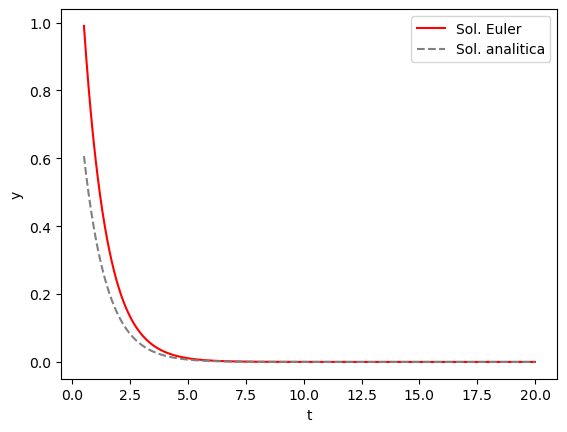

In [2]:
y = 1 # valor inicial
dt = 0.01 # paso
t = np.arange(0.5,20,dt) # intervalo de tiempo
y_respuesta = np.zeros(len(t)) # vector donde guardaremos los datos  de la simulación

#itero por cada índice
for i in range(len(t)-1):
    f = -y
    y = y + f * dt
    y_respuesta[i] = y

plt.plot(t, y_respuesta, 'red', label= 'Sol. Euler')

#si quiero contrastar contra la solución analítica
test_y =  1*np.exp(-t)
plt.plot(t, test_y, 'gray', linestyle ='dashed', label = 'Sol. analitica')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### Ejemplo 2. Caída libre.
Las variables de estado iniciales estarán dadas por el ejercicio a simular.

La ecuación diferencial está dada por: <br>
$( \ddot{y} = -g) $ <br>

$( \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g)$<br>

Con solución analítica: $( y(t)=-\frac{1}{2}g t^2+v_0t+y_0)$ <br>



In [6]:
def euler(f,t,y,v):
    # f: funcion
    # t: tiempo
    # y: valor inicial y(t)
    # v: valor inicial y'(t)
    
    y_resultado = np.zeros(len(t))
    v_resultado = np.zeros(len(t))
    dt = t[1]-t[0] 
    max_indice = len(t) - 1

    for i in range(max_indice):
        y = y + v * dt #ver que estoy aproximando al polinomio de Taylor de grado 1, puedo mejorarlo? pero pues claro!, cambiandolo al P de T de grado 2 como dejo comentado abajo ;)
        #y = y + v * dt + 0.5 * f(t[i],y,v) * dt **2
        v = v + f(t[i],y,v) * dt
        y_resultado[i] = y 
        v_resultado[i] = v
    y_resultado[max_indice] = None 
    v_resultado[max_indice] = None
    return t, y_resultado, v_resultado


In [ ]:
def cromer(f,t,y,v):
    #es lo mismo que el método de Euler, pero con una pequeña diferencia, la velocidad se calcula ANTES de actualizar la posición
    # f: funcion
    # t: tiempo
    # y: valor inicial y(t)
    # v: valor inicial y'(t)
    
    y_resultado = np.zeros(len(t))
    v_resultado = np.zeros(len(t))
    dt = t[1]-t[0] 
    max_indice = len(t) - 1

    for i in range(max_indice):
        v = v + f(t[i],y,v) * dt
        y = y + v * dt 
        y_resultado[i] = y 
        v_resultado[i] = v
    y_resultado[max_indice] = None 
    v_resultado[max_indice] = None
    return t, y_resultado, v_resultado

In [9]:
g = 9.81

#defino la funcion derivada resultado de la EDO
def f_resultado(t,y,v):
    return -g

dt = 0.1
t = np.arange(0,15,dt) #creo un intervalo de tiempo para la simulación
y0 = 20
v0 = 60

t,y,v = euler(f_resultado,t,y0,v0)
t,y_c,v_c = cromer(f_resultado,t,y0,v0)

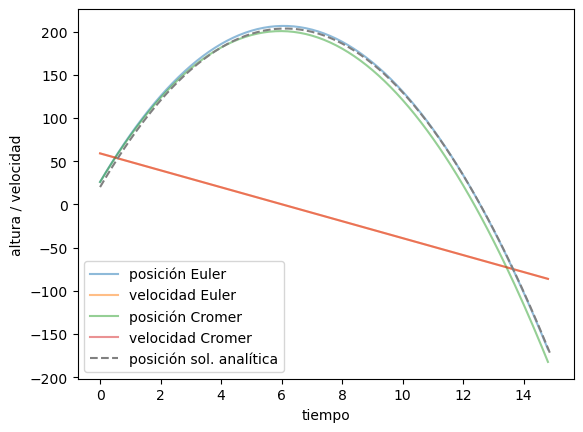

In [11]:
plt.xlabel('tiempo')
plt.ylabel('altura / velocidad')
plt.plot(t,y, label = 'posición Euler',alpha=0.5)
plt.plot(t,v, label = 'velocidad Euler',alpha=0.5)
plt.plot(t,y_c, label = 'posición Cromer', alpha=0.5)
plt.plot(t,v_c, label = 'velocidad Cromer',alpha=0.5)
#para contrastar contra la solucion analítica
solucion = -g/2*t**2 + v0*t + y0
plt.plot(t, solucion , color = 'gray',linestyle='dashed', label = 'posición sol. analítica')
plt.legend()
